In [9]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [10]:
# Parameters
d = 1
k = 1
delta = 0.1
Ns = np.linspace(10, 100, 10, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
integrator = rad.integrate.MeanIntegrator(ranges, 2000)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Data collection
results = np.zeros((np.size(Ns), 2))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
    approx = solver.solve(f)
    error = rad.error(exact, approx, integrator)
    cond = solver.cond()
    
    results[i,0] = error 
    results[i, 1] = solver.cond()
    
    print("N:", N)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

N: 10
  L2 Relative Error: 0.8607006413380913
  Condition Number: 4.313450213464549
N: 20
  L2 Relative Error: 0.22907513234921947
  Condition Number: 103.66728543856644
N: 30
  L2 Relative Error: 0.364788814596446
  Condition Number: 317.01027300601316
N: 40
  L2 Relative Error: 0.26531938379139197
  Condition Number: 641.0363334249907
N: 50
  L2 Relative Error: 0.16493362236970543
  Condition Number: 6394.449368603653
N: 60
  L2 Relative Error: 0.10353386979547563
  Condition Number: 12178.903270735715
N: 70
  L2 Relative Error: 0.06358619984513082
  Condition Number: 49500.9585031239
N: 80
  L2 Relative Error: 0.03807935570640641
  Condition Number: 85544.06825342787
N: 90
  L2 Relative Error: 0.02103696970896959
  Condition Number: 231330.6530337718
N: 100
  L2 Relative Error: 0.009397931832287019
  Condition Number: 372280.7753761892


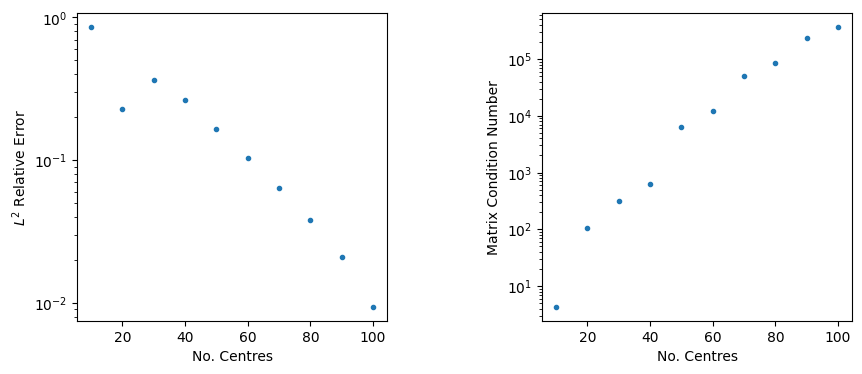

In [11]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("No. Centres")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(Ns, results[:, 0], '.')

axs[1].set_xlabel("No. Centres")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()